In [2]:
# https://www.kaggle.com/code/ammarkhan071/synthea-analysis

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

../data/patients.csv
../data/claims.csv
../data/payer_transitions.csv
../data/medications.csv
../data/procedures.csv
../data/supplies.csv
../data/allergies.csv
../data/devices.csv
../data/imaging_studies.csv
../data/claims_transactions.csv
../data/providers.csv
../data/payers.csv
../data/organizations.csv
../data/immunizations.csv
../data/encounters.csv
../data/careplans.csv
../data/conditions.csv
../data/observations.csv


Importing the data in allergies.csv

In [8]:
allergies = pd.read_csv("../data/allergies.csv")
allergies.head()

,START,STOP,PATIENT,ENCOUNTER,CODE,SYSTEM,DESCRIPTION,TYPE,CATEGORY,REACTION1,DESCRIPTION1,SEVERITY1,REACTION2,DESCRIPTION2,SEVERITY2
0,1984-06-20,NaN,6ad5591f-896a-4c1c-4421-8c43633fa91a,04ea23ce-06af-94ec-0fbe-6f6fb37e3e84,419199007,Unknown,Allergy to substance (finding),allergy,environment,NaN,NaN,NaN,NaN,NaN,NaN
1,1984-06-20,NaN,6ad5591f-896a-4c1c-4421-8c43633fa91a,04ea23ce-06af-94ec-0fbe-6f6fb37e3e84,111088007,Unknown,Latex (substance),allergy,environment,39579001.0,Anaphylaxis (disorder),SEVERE,402387002.0,Allergic angioedema (disorder),MODERATE
2,1984-06-20,NaN,6ad5591f-896a-4c1c-4421-8c43633fa91a,04ea23ce-06af-94ec-0fbe-6f6fb37e3e84,84489001,Unknown,Mold (organism),allergy,environment,76067001.0,Sneezing,MILD,267101005.0,Nose running,MILD
3,1984-06-20,NaN,6ad5591f-896a-4c1c-4421-8c43633fa91a,04ea23ce-06af-94ec-0fbe-6f6fb37e3e84,260147004,Unknown,House dust mite (organism),allergy,environment,NaN,NaN,NaN,NaN,NaN,NaN
4,1984-06-20,NaN,6ad5591f-896a-4c1c-4421-8c43633fa91a,04ea23ce-06af-94ec-0fbe-6f6fb37e3e84,264287008,Unknown,Animal dander (substance),allergy,environment,878820003.0,Rhinoconjunctivitis (disorder),MODERATE,271807003.0,Eruption of skin (disorder),MILD


lets see the shape of the data

In [9]:
allergies.shape

(883, 15)

so it has 883 rows and 15 columns

Lets see how many distinct kind of allergies exists

In [10]:
allergies.DESCRIPTION.nunique(),allergies.DESCRIPTION.count(),allergies.CODE.nunique(),allergies.CODE.count()

(22, 883, 22, 883)

22 distinct allergies exist throughout the data. Lets see which are the most common ones and which are the least common ones.

In [11]:
allergy_group = allergies.groupby(["DESCRIPTION"]).agg({"DESCRIPTION":"count"})
allergy_group = allergy_group.rename(columns = {"DESCRIPTION":"COUNT"})
allergy_group = allergy_group.reset_index().sort_values(by = ["COUNT"],ascending = False)
allergy_group

,DESCRIPTION,COUNT
0,Allergy to substance (finding),168
12,Mold (organism),96
1,Animal dander (substance),89
19,Tree pollen (substance),74
8,House dust mite (organism),72
7,Grass pollen (substance),69
15,Shellfish (substance),36
6,Fish (substance),34
2,Aspirin,30
20,Wheat (substance),27


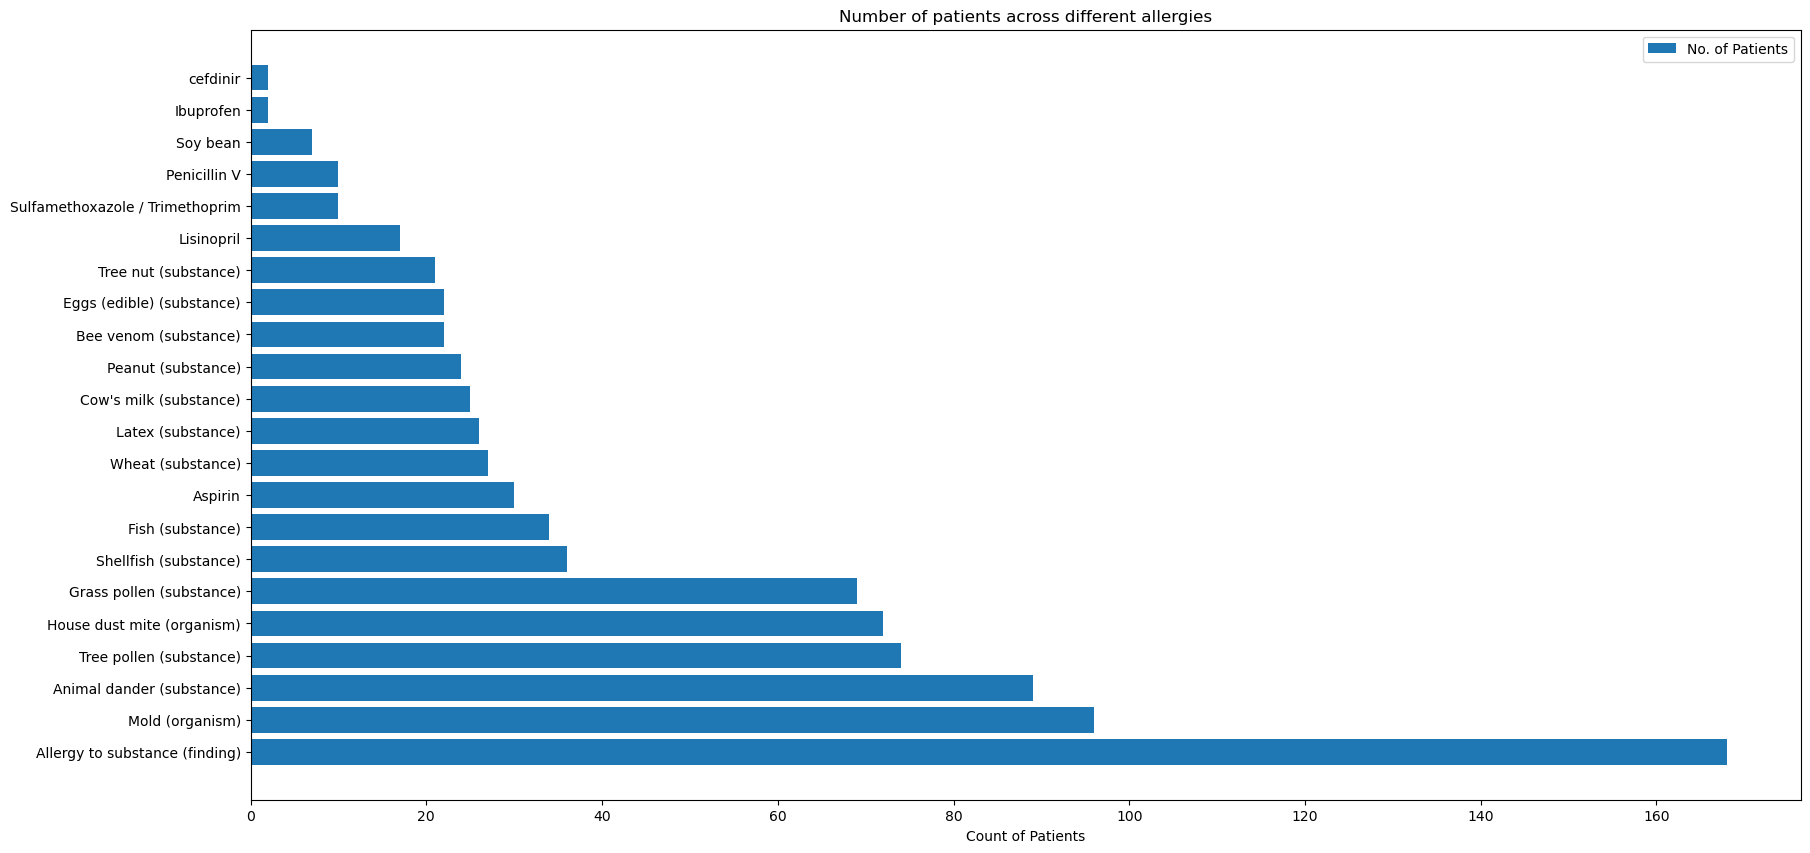

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (20,10))
plt.barh(allergy_group.DESCRIPTION,allergy_group.COUNT)
plt.legend(["No. of Patients"])
plt.title("Number of patients across different allergies")
plt.xlabel("Count of Patients")
plt.show()

Lets import the data related to encounters

In [17]:
encounters = pd.read_csv("../data/encounters.csv")
encounters.head()

,Id,START,STOP,PATIENT,ORGANIZATION,PROVIDER,PAYER,ENCOUNTERCLASS,CODE,DESCRIPTION,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE,REASONDESCRIPTION
0,06f5dc55-f233-ee0d-0b1b-3382c2c884dc,2013-03-29T07:01:56Z,2013-03-29T07:16:56Z,19730eb6-2503-aa11-806c-4b7234a94a63,f1664435-2eca-3eff-bd1a-13701e7ad1bd,9973ae85-5835-3b8b-b0ae-e01401876492,df166300-5a78-3502-a46a-832842197811,wellness,410620009,Well child visit (procedure),136.80,755.38,655.38,NaN,NaN
1,dcd630e2-9323-2697-1922-d476b8c3b278,2014-04-04T07:01:56Z,2014-04-04T07:16:56Z,19730eb6-2503-aa11-806c-4b7234a94a63,f1664435-2eca-3eff-bd1a-13701e7ad1bd,9973ae85-5835-3b8b-b0ae-e01401876492,df166300-5a78-3502-a46a-832842197811,wellness,410620009,Well child visit (procedure),136.80,1268.68,1168.68,NaN,NaN
2,e5c4c97e-0e09-c2a1-6338-f2ec2a6f6585,2015-04-10T07:01:56Z,2015-04-10T07:25:41Z,19730eb6-2503-aa11-806c-4b7234a94a63,f1664435-2eca-3eff-bd1a-13701e7ad1bd,9973ae85-5835-3b8b-b0ae-e01401876492,df166300-5a78-3502-a46a-832842197811,wellness,410620009,Well child visit (procedure),136.80,1089.00,989.00,NaN,NaN
3,f176e47f-1453-4d16-db1e-f9143b7ce003,2016-03-14T07:01:56Z,2016-03-14T07:16:56Z,19730eb6-2503-aa11-806c-4b7234a94a63,c7542447-e06e-32cb-b6db-243c23a0dbc2,60db7a9b-a3dc-3e8b-a631-39f3c9991c50,df166300-5a78-3502-a46a-832842197811,outpatient,698314001,Consultation for treatment,142.58,142.58,92.58,389095005.0,Contraception care (regime/therapy)
4,8c0378d0-7263-b05b-bd57-c3d9122c8249,2016-04-15T07:01:56Z,2016-04-15T07:16:56Z,19730eb6-2503-aa11-806c-4b7234a94a63,f1664435-2eca-3eff-bd1a-13701e7ad1bd,9973ae85-5835-3b8b-b0ae-e01401876492,df166300-5a78-3502-a46a-832842197811,wellness,410620009,Well child visit (procedure),136.80,1451.68,1351.68,NaN,NaN


In [19]:
providers = pd.read_csv("../data/providers.csv")
providers.head()

,Id,ORGANIZATION,NAME,GENDER,SPECIALITY,ADDRESS,CITY,STATE,ZIP,LAT,LON,ENCOUNTERS,PROCEDURES
0,35a3ffba-0f7f-3d91-9e8c-6540236f853e,74ab949d-17ac-3309-83a0-13b4405c66aa,Ted955 Reilly981,M,GENERAL PRACTICE,881 Main Street,Fitchburg,MA,1420,42.586487,-71.805210,946,0
1,563a8000-87a5-3549-a2f5-5874809df9b5,588f6ce6-b8db-3588-8189-29db2680a313,Terence292 Brakus656,M,GENERAL PRACTICE,461 WALNUT AVE,JAMAICA PLAIN,MA,21302331,42.311588,-71.098001,43,0
2,4482fe8d-23c0-33b4-9873-8f77f6ae01f2,324b4137-57a0-3ae0-89db-1c33f57ae0c1,Marquis364 Satterfield305,M,GENERAL PRACTICE,134 NORTH ST,NORTH READING,MA,18641315,42.589234,-71.105465,1,0
3,b996896a-617e-3b0e-8f1c-74a44439f72c,faffaf6a-ee1a-3673-b0b0-421a9c249244,Gustavo235 Armstrong51,M,GENERAL PRACTICE,66 WASHINGTON ST,STOUGHTON,MA,20722571,42.144158,-71.103783,80,0
4,867e7bf5-8562-306e-815a-9ce873a803f6,17a4bae5-8b64-34d7-8144-b428be027bd0,Isabela97 Solorio55,F,GENERAL PRACTICE,512 MAIN STREET SUITE 211,SHREWSBURY,MA,15456406,42.295110,-71.718085,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
784,e0727599-cd17-34e3-b415-251b081e447f,7b5bf0fc-c5c0-3f22-980b-fdfff326a9b4,Tabitha433 Kling921,F,GENERAL PRACTICE,40 CUMBERLAND AVE,NORTH ATTLEBORO,MA,27604445,41.931668,-71.354075,71,0
785,ed7e2f27-7df9-3fd0-8430-1c6964274292,ba07b31b-bf14-39b8-be95-4c5ca5062daa,Hermelinda327 Hyatt152,F,GENERAL PRACTICE,1575 CAMBRIDGE ST,CAMBRIDGE,MA,21384308,42.375210,-71.107113,697,0
786,9bc4f37d-4feb-3f66-a21a-15c7a9f40620,6aae7a31-90df-3455-ad8d-81f8cf2d21e8,Houston994 Funk324,M,GENERAL PRACTICE,680 CENTRE ST,BROCKTON,MA,23023308,42.087275,-70.991074,1182,0
787,468f9a73-40df-3fdb-a867-bbd9e2f351d3,14036728-b721-3e4b-8755-8ee8ab6ed15e,Rocky100 Schmeler639,M,GENERAL PRACTICE,625 MOUNT AUBURN ST,CAMBRIDGE,MA,21384518,42.375351,-71.146863,99,0


In [23]:
patients = pd.read_csv("../data/patients.csv")
patients.head()

,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,...,CITY,STATE,COUNTY,FIPS,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,INCOME
0,19730eb6-2503-aa11-806c-4b7234a94a63,2002-03-15,NaN,999-36-3690,S99975120,X7184146X,Ms.,Latarsha812,Rempel203,NaN,...,Cambridge,Massachusetts,Middlesex County,25017.0,2141,42.343946,-71.184986,3750.00,39241.22,20524
1,f78a8b0a-7deb-9ee5-8138-6eec00a8a6bd,1992-03-28,NaN,999-15-9698,S99987509,X4071408X,Mrs.,Adelaida985,Von197,NaN,...,Waltham,Massachusetts,Middlesex County,25017.0,2472,42.386029,-71.176881,335804.78,11068.11,99065
2,d493025f-604d-dc41-a43c-df48181b0631,1983-10-04,NaN,999-28-7815,S99957350,X81228678X,Mr.,Nicky270,Nolan344,NaN,...,Worcester,Massachusetts,Worcester County,25027.0,1605,42.300071,-71.801819,70046.24,5246.45,69680
3,bebec5d6-cc26-a3b5-97be-9384377d7fbf,2001-05-18,NaN,999-82-4180,S99951675,X21499338X,Ms.,Sage164,Lockman863,NaN,...,Weymouth,Massachusetts,Norfolk County,25021.0,2190,42.180724,-70.905837,77317.61,152376.99,106154
4,6f39d4d5-3c17-b6eb-c23e-04124a50f41a,2001-04-09,NaN,999-91-8228,S99958608,X3218101X,Ms.,Shakira391,McClure239,NaN,...,Worcester,Massachusetts,Worcester County,25027.0,1608,42.270690,-71.748985,57229.48,180761.73,43553


In [29]:
# Dead patients
patients["DEATHDATE"].count()

78

In [30]:
# Alive patients
patients["BIRTHDATE"].count() - patients["DEATHDATE"].count()

1000

In [31]:
# Add age of patient
from datetime import datetime, date
def toage(x):
    today = date.today() 
    born = datetime.strptime(x, "%Y-%m-%d").date()
    
    return (today.year - born.year - ((today.month, today.day) < (born.month,born.day)))

patients["Age"] = patients.BIRTHDATE.apply(toage)
patients.head()


,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,...,STATE,COUNTY,FIPS,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,INCOME,Age
0,19730eb6-2503-aa11-806c-4b7234a94a63,2002-03-15,NaN,999-36-3690,S99975120,X7184146X,Ms.,Latarsha812,Rempel203,NaN,...,Massachusetts,Middlesex County,25017.0,2141,42.343946,-71.184986,3750.00,39241.22,20524,21
1,f78a8b0a-7deb-9ee5-8138-6eec00a8a6bd,1992-03-28,NaN,999-15-9698,S99987509,X4071408X,Mrs.,Adelaida985,Von197,NaN,...,Massachusetts,Middlesex County,25017.0,2472,42.386029,-71.176881,335804.78,11068.11,99065,31
2,d493025f-604d-dc41-a43c-df48181b0631,1983-10-04,NaN,999-28-7815,S99957350,X81228678X,Mr.,Nicky270,Nolan344,NaN,...,Massachusetts,Worcester County,25027.0,1605,42.300071,-71.801819,70046.24,5246.45,69680,40
3,bebec5d6-cc26-a3b5-97be-9384377d7fbf,2001-05-18,NaN,999-82-4180,S99951675,X21499338X,Ms.,Sage164,Lockman863,NaN,...,Massachusetts,Norfolk County,25021.0,2190,42.180724,-70.905837,77317.61,152376.99,106154,22
4,6f39d4d5-3c17-b6eb-c23e-04124a50f41a,2001-04-09,NaN,999-91-8228,S99958608,X3218101X,Ms.,Shakira391,McClure239,NaN,...,Massachusetts,Worcester County,25027.0,1608,42.270690,-71.748985,57229.48,180761.73,43553,22


As seen above we are only attracting patients from Massachusetts. So either the service that we provide is not good enough to attract patients from other state or the other state have good healthcare structure so they dont need to travel across states.

In [32]:
procedures = pd.read_csv("../data/procedures.csv")
procedures.head()

,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION,BASE_COST,REASONCODE,REASONDESCRIPTION
0,2014-04-04T07:01:56Z,2014-04-04T07:16:56Z,19730eb6-2503-aa11-806c-4b7234a94a63,dcd630e2-9323-2697-1922-d476b8c3b278,430193006,Medication Reconciliation (procedure),428.48,NaN,NaN
1,2014-04-04T07:01:56Z,2014-04-04T07:15:18Z,19730eb6-2503-aa11-806c-4b7234a94a63,dcd630e2-9323-2697-1922-d476b8c3b278,171207006,Depression screening (procedure),431.40,NaN,NaN
2,2014-04-04T07:15:18Z,2014-04-04T07:39:36Z,19730eb6-2503-aa11-806c-4b7234a94a63,dcd630e2-9323-2697-1922-d476b8c3b278,715252007,Depression screening using Patient Health Ques...,32.75,NaN,NaN
3,2014-04-04T07:39:36Z,2014-04-04T07:54:23Z,19730eb6-2503-aa11-806c-4b7234a94a63,dcd630e2-9323-2697-1922-d476b8c3b278,428211000124100,Assessment of substance use (procedure),431.40,NaN,NaN
4,2014-04-04T07:54:23Z,2014-04-04T08:06:56Z,19730eb6-2503-aa11-806c-4b7234a94a63,dcd630e2-9323-2697-1922-d476b8c3b278,868187001,Assessment using Car Relax Alone Forget Fr...,431.40,NaN,NaN


In [33]:
procedures.DESCRIPTION.nunique()

275

In [34]:
proc_enc = procedures.merge(encounters,left_on = "ENCOUNTER",right_on = "Id")
proc_enc.head()

,START_x,STOP_x,PATIENT_x,ENCOUNTER,CODE_x,DESCRIPTION_x,BASE_COST,REASONCODE_x,REASONDESCRIPTION_x,Id,...,PROVIDER,PAYER,ENCOUNTERCLASS,CODE_y,DESCRIPTION_y,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE_y,REASONDESCRIPTION_y
0,2014-04-04T07:01:56Z,2014-04-04T07:16:56Z,19730eb6-2503-aa11-806c-4b7234a94a63,dcd630e2-9323-2697-1922-d476b8c3b278,430193006,Medication Reconciliation (procedure),428.48,NaN,NaN,dcd630e2-9323-2697-1922-d476b8c3b278,...,9973ae85-5835-3b8b-b0ae-e01401876492,df166300-5a78-3502-a46a-832842197811,wellness,410620009,Well child visit (procedure),136.8,1268.68,1168.68,NaN,NaN
1,2014-04-04T07:01:56Z,2014-04-04T07:15:18Z,19730eb6-2503-aa11-806c-4b7234a94a63,dcd630e2-9323-2697-1922-d476b8c3b278,171207006,Depression screening (procedure),431.40,NaN,NaN,dcd630e2-9323-2697-1922-d476b8c3b278,...,9973ae85-5835-3b8b-b0ae-e01401876492,df166300-5a78-3502-a46a-832842197811,wellness,410620009,Well child visit (procedure),136.8,1268.68,1168.68,NaN,NaN
2,2014-04-04T07:15:18Z,2014-04-04T07:39:36Z,19730eb6-2503-aa11-806c-4b7234a94a63,dcd630e2-9323-2697-1922-d476b8c3b278,715252007,Depression screening using Patient Health Ques...,32.75,NaN,NaN,dcd630e2-9323-2697-1922-d476b8c3b278,...,9973ae85-5835-3b8b-b0ae-e01401876492,df166300-5a78-3502-a46a-832842197811,wellness,410620009,Well child visit (procedure),136.8,1268.68,1168.68,NaN,NaN
3,2014-04-04T07:39:36Z,2014-04-04T07:54:23Z,19730eb6-2503-aa11-806c-4b7234a94a63,dcd630e2-9323-2697-1922-d476b8c3b278,428211000124100,Assessment of substance use (procedure),431.40,NaN,NaN,dcd630e2-9323-2697-1922-d476b8c3b278,...,9973ae85-5835-3b8b-b0ae-e01401876492,df166300-5a78-3502-a46a-832842197811,wellness,410620009,Well child visit (procedure),136.8,1268.68,1168.68,NaN,NaN
4,2014-04-04T07:54:23Z,2014-04-04T08:06:56Z,19730eb6-2503-aa11-806c-4b7234a94a63,dcd630e2-9323-2697-1922-d476b8c3b278,868187001,Assessment using Car Relax Alone Forget Fr...,431.40,NaN,NaN,dcd630e2-9323-2697-1922-d476b8c3b278,...,9973ae85-5835-3b8b-b0ae-e01401876492,df166300-5a78-3502-a46a-832842197811,wellness,410620009,Well child visit (procedure),136.8,1268.68,1168.68,NaN,NaN


In [35]:
proc_enc.DESCRIPTION_y.nunique()

46

In [6]:
conditions = pd.read_csv("../data/conditions.csv")
conditions.head()

,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION
0,2013-03-29,2014-04-04,19730eb6-2503-aa11-806c-4b7234a94a63,06f5dc55-f233-ee0d-0b1b-3382c2c884dc,314529007,Medication review due (situation)
1,2015-04-10,2015-04-10,19730eb6-2503-aa11-806c-4b7234a94a63,e5c4c97e-0e09-c2a1-6338-f2ec2a6f6585,314529007,Medication review due (situation)
2,2016-04-15,2016-04-15,19730eb6-2503-aa11-806c-4b7234a94a63,8c0378d0-7263-b05b-bd57-c3d9122c8249,314529007,Medication review due (situation)
3,2016-05-01,2016-05-09,19730eb6-2503-aa11-806c-4b7234a94a63,4b20b601-700d-e741-4ba3-c0e2358095b7,10509002,Acute bronchitis (disorder)
4,2016-05-13,2017-04-21,19730eb6-2503-aa11-806c-4b7234a94a63,6c5628e0-b124-1269-43f2-d787c6e74cb7,314529007,Medication review due (situation)


In [7]:
conditions.DESCRIPTION.nunique()

249

In [38]:
conditions_group = conditions.groupby(["DESCRIPTION"]).agg({"DESCRIPTION":"count"})
conditions_group = conditions_group.rename(columns = {"DESCRIPTION":"COUNT"})
conditions_group = conditions_group.reset_index().sort_values(by = ["COUNT"],ascending = False)
conditions_group

,DESCRIPTION,COUNT
142,Medication review due (situation),16711
228,Stress (finding),4702
90,Full-time employment (finding),4543
169,Part-time employment (finding),2012
133,Limited social contact (finding),1290
...,...,...
218,Social migrant (finding),1
153,Neoplasm of prostate,1
221,Spina bifida occulta (disorder),1
100,History of artificial joint (situation),1


In [40]:
conditions_group[conditions_group['DESCRIPTION'].str.contains('(disorder)')]



/tmp/ipykernel_139/2738589546.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  conditions_group[conditions_group['DESCRIPTION'].str.contains('(disorder)')]


,DESCRIPTION,COUNT
245,Viral sinusitis (disorder),1152
12,Acute viral pharyngitis (disorder),623
6,Acute bronchitis (disorder),544
14,Anemia (disorder),385
75,Essential hypertension (disorder),366
...,...,...
51,Chronic type B viral hepatitis (disorder),1
211,Shock (disorder),1
183,Proliferative diabetic retinopathy due to type...,1
221,Spina bifida occulta (disorder),1
